In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("churn_dataset.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Dropping irrelevant columns
dataset = dataset.drop(columns='customerID')
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Percentage of churn: 26.536987079369588
Percentage of not churn: 73.4630129206304


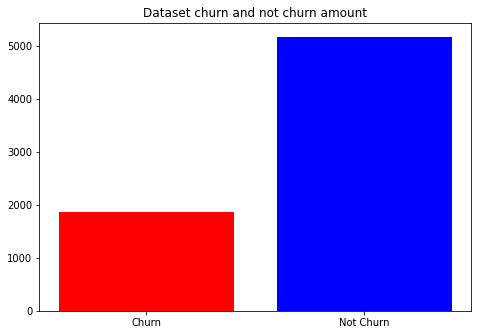

In [3]:
churn = len(dataset.loc[dataset['Churn'] == 'Yes'])
not_churn = len(dataset.loc[dataset['Churn'] == 'No'])

total = churn + not_churn

figure = plt.figure()
ax = figure.add_axes([0, 0, 1, 1])
labels = ['Churn', 'Not Churn']
counters = [churn, not_churn]

print(f"Percentage of churn: {(churn / total) * 100}")
print(f"Percentage of not churn: {(not_churn / total) * 100}")

ax.set_title("Dataset churn and not churn amount")
ax.bar(labels, counters, color=['red', 'blue'])
plt.show()


In [4]:
# One-Big Hot Encoding

DUMMY_DICT = [
    {
        "column": dataset.MultipleLines,
        "prefix": "MultipleLines"
    },
    {
        "column": dataset.InternetService,
        "prefix": "InternetService",
    },
    {
        "column": dataset.PaymentMethod,
        "prefix": "PaymentMethod",
    },
    {
        "column": dataset.OnlineSecurity,
        "prefix": "OnlineSecurity",
    },
    {
        "column": dataset.OnlineBackup,
        "prefix": "OnlineBackup",
    },
    {
        "column": dataset.Contract,
        "prefix": "Contract",
    },
    {
        "column": dataset.StreamingMovies,
        "prefix": "StreamingMovies",
    },
    {
        "column": dataset.StreamingTV,
        "prefix": "StreamingTV",
    },
    {
        "column": dataset.TechSupport,
        "prefix": "TechSupport",
    },
    {

        "column": dataset.DeviceProtection,
        "prefix": "DeviceProtection",
    },
]

for dummy_element in DUMMY_DICT:
    dummy = pd.get_dummies(dummy_element["column"], prefix=dummy_element["prefix"])
    # dataset = dataset.drop(columns=dummy_element["prefix"])
    dataset = dataset.join(dummy)



dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,1,0,0,1,0,0,1,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,0,1,0,0,1,0,0,0,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0,1,0,0,1,0,0,1,0,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,0,1,0,0,0,0,1,0,0,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0,1,0,0,1,0,0,1,0,0


In [5]:
# Transform Yes/No columns to binary
BINARY_COLUMNS = [
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling",
]
for col in BINARY_COLUMNS:
    dataset[col] = dataset[col].map({'Yes' : 1, 'No' : 0})

# Gender
dataset['gender'] = dataset['gender'].map({'Male' : 1, 'Female' : 0})


# Helper column of numeric churn value
dataset['ChurnNumeric'] = dataset['Churn'].map({'Yes' : 1, 'No' : 0})

dataset.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,ChurnNumeric
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,...,1,0,0,1,0,0,1,0,0,0
1,1,0,0,0,34,1,No,DSL,Yes,No,...,1,0,0,1,0,0,0,0,1,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,...,1,0,0,1,0,0,1,0,0,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,...,1,0,0,1,0,0,1,0,0,1


In [6]:
# Observations with means
'''
1. Customers with no partners (living alone) tend to cancel more
2. Senior citizens are slightly more likely to cancel service (only sligthly)
3. Customers that has stayed longer with the company are less likely to cancel.
4. Customers with hgiher monthly charges are more likely to cancel.
5. Customers with fiber optic are double more likely to cancel.
6. Customers that pay with electronic check are more likely to cancel.
7. Customers with no online security are way more likely to cancel.
8. Customers that pay month to month are twice more likely to cancel.
9. Customers that dont have tech support are more likely to cancel.

'''
pd.set_option('display.max_columns', None)
dataset.groupby('Churn').mean()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,ChurnNumeric
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,0.507344,0.128721,0.528218,0.344801,37.569965,0.901044,0.535562,61.265124,0.491109,0.098956,0.409934,0.379204,0.347700,0.273096,0.248550,0.249324,0.250097,0.252029,0.393699,0.273096,0.333204,0.358523,0.273096,0.368380,0.429068,0.252609,0.318322,0.356977,0.273096,0.369927,0.361036,0.273096,0.365868,0.391767,0.273096,0.335137,0.364128,0.273096,0.362775,0.0
Yes,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,0.749064,74.441332,0.454254,0.090958,0.454789,0.245586,0.693954,0.060460,0.138042,0.124131,0.573034,0.164794,0.781701,0.060460,0.157838,0.659711,0.060460,0.279829,0.885500,0.088818,0.025682,0.501873,0.060460,0.437667,0.504013,0.060460,0.435527,0.773676,0.060460,0.165864,0.647940,0.060460,0.291600,1.0


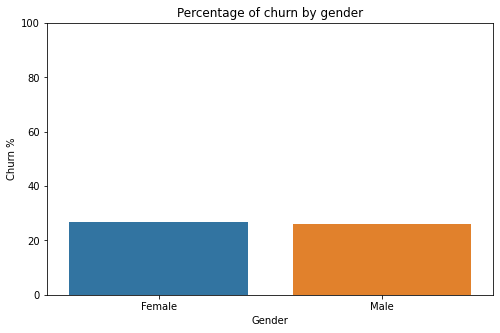

In [7]:
# Making visualizations of previous observations

# Using gender as predictor
fig, axes2 = plt.subplots(figsize=(8,5))

sns.barplot(x="gender", y=dataset["ChurnNumeric"]*100, data=dataset, ci=None, ax=axes2)
axes2.set_xlabel('Gender')
axes2.set_ylabel('Churn %')
axes2.set_title('Percentage of churn by gender')
axes2.set_ylim(0,100)
axes2.set_xticklabels(['Female', 'Male'])
plt.show()


# Graph shows no correlation between gender and churn. Thus, we drop gender for our hypothesis

(0.0, 1.0)

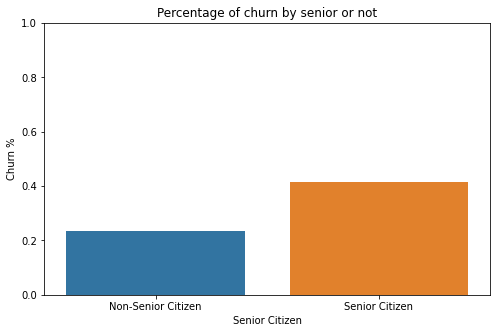

In [8]:
fig, axes3 = plt.subplots(1, 1, figsize=(8,5))

# Chances of churn based on SeniorCitizen
sns.barplot(x="SeniorCitizen", y="ChurnNumeric", data=dataset, ci=None, ax=axes3)
axes3.set_xlabel('Senior Citizen')
axes3.set_ylabel('Churn %')
axes3.set_title('Percentage of churn by senior or not')
axes3.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes3.set_ylim(0,1)


# As seen on the plots, big mayority of customers in the dataset are non-senior. However, senior citizens are twice as likely to 
# churn. We take senior-citizen as a predictor.

(0.0, 1.0)

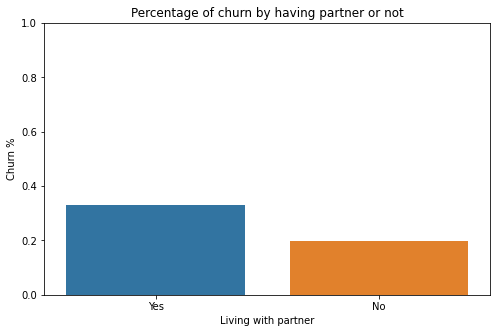

In [9]:
fig, axes4 = plt.subplots(1, 1, figsize=(8,5))

# Chances of churn based on SeniorCitizen
sns.barplot(x="Partner", y="ChurnNumeric", data=dataset, ci=None, ax=axes4)
axes4.set_xlabel('Living with partner')
axes4.set_ylabel('Churn %')
axes4.set_title('Percentage of churn by having partner or not')
axes4.set_xticklabels(['Yes', 'No'])
axes4.set_ylim(0,1)


# Customers living alone are slightly more likely to cancel services. We will take this into account for our hypothersis.


(0.0, 1.0)

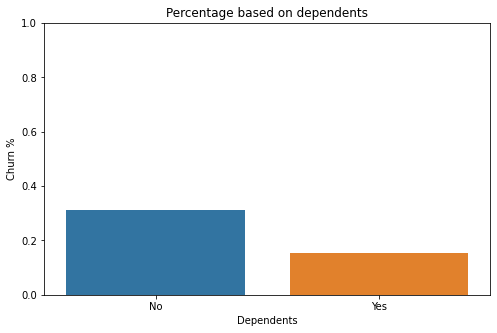

In [10]:
fig, axes5 = plt.subplots(1, 1, figsize=(8,5))

# Chances of churn based on SeniorCitizen
sns.barplot(x="Dependents", y="ChurnNumeric", data=dataset, ci=None, ax=axes5)
axes5.set_xlabel('Dependents')
axes5.set_ylabel('Churn %')
axes5.set_title('Percentage based on dependents')
axes5.set_xticklabels(['No', 'Yes'])
axes5.set_ylim(0,1)

# Customers without dependents tend to cancel service more. We consider this as a predictor.

# Given this and the partner observation, we can conclude that customers that are alone/independent tend to cancel more,
# while people with dependent or partners are less likely.

Text(0.5, 1.0, 'Churn percenage based on Tenure')

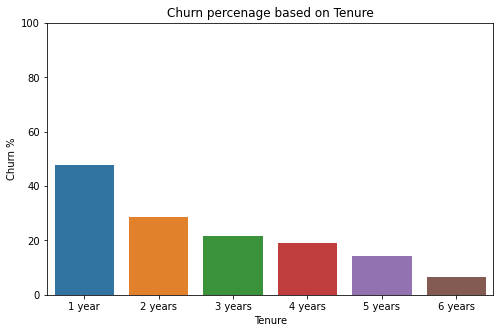

In [11]:
# Chances of churn based on Tenure (numeric that represents months)

# Divided by years
buckets = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 year', '2 years', '3 years', '4 years', '5 years', '6 years']

dataset['tenure_bucket'] = pd.cut(dataset['tenure'], buckets, labels=labels)
 
fig, axes6 = plt.subplots(1, 1, figsize=(8,5))
sns.barplot(x="tenure_bucket", y=dataset.ChurnNumeric*100, data=dataset, ci=None, ax=axes6)
axes6.set_xlabel('Tenure')
axes6.set_ylabel('Churn %')
axes6.set_ylim(0,100)
axes6.set_title('Churn percenage based on Tenure')


# As seen on the plot, there is a linear relationship between the longer the customer is with the service vs 
# the change of cancelling the service. That being said, new customers tend to cancel the service more frequently.

(0.0, 100.0)

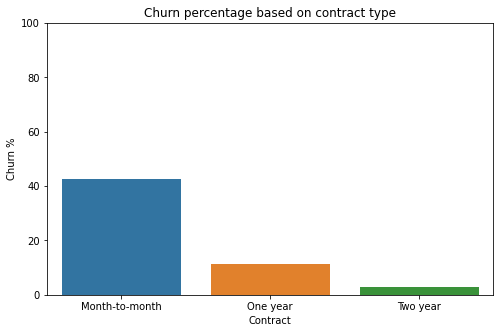

In [12]:
fig, axes7 = plt.subplots(1, 1, figsize=(8,5))

#Contract_Month-to-month	Contract_One year	Contract_Two year

# Chances of churn based on Contract
sns.barplot(x="Contract" , y=dataset.ChurnNumeric*100, data=dataset, ci=None, ax=axes7)
axes7.set_ylabel('Churn %')
axes7.set_title("Churn percentage based on contract type")
axes7.set_ylim(0,100)

# As seen on the plot, a month-to-month contract type has a way bigger chance of churn

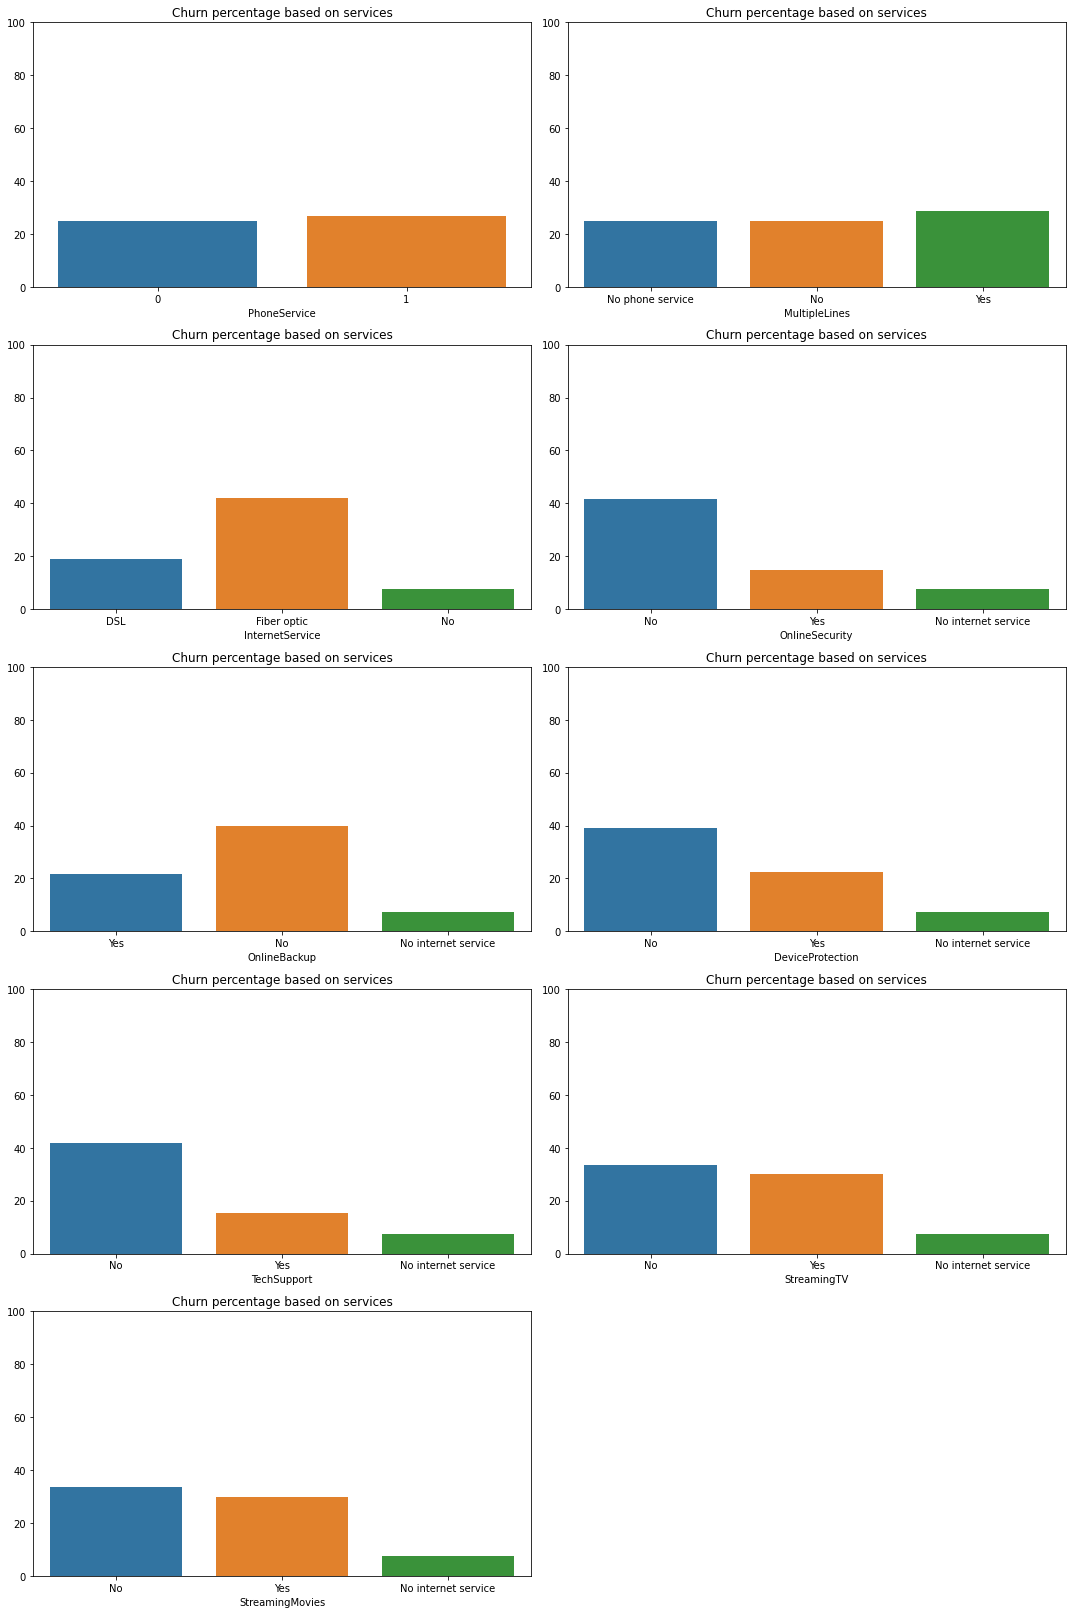

'\n Observations\n\n1. Fiber optic internet sevice customers are WAY more likely to churn\n2. Customers with NO Online Security are way more likely to churn\n3. Customers with NO Online Backup are way more likely to churn\n4. Customers with NO Device Protection are way more likely to churn\n5. Customers with NO Tech Support are way more likely to churn\n\n'

In [13]:
# Comparing types of services with churn percentage

services = ['PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig = plt.figure(figsize=(15,40))
i = 1
for service in enumerate(services):
    data = dataset[service[1]].value_counts(normalize=True).sort_index()
    axes = fig.add_subplot(len(services), 2, i)

    sns.barplot(x=service[1], y=dataset.ChurnNumeric*100, data=dataset, ci=None, ax=axes)
    
    axes.set_title('Churn percentage based on services')
    axes.set_xlabel(service[1])
    axes.set_ylabel('')
    axes.set_ylim(0,100)

    i = i + 1

fig.tight_layout()
plt.show()

'''
 Observations

1. Fiber optic internet sevice customers are WAY more likely to churn
2. Customers with NO Online Security are way more likely to churn
3. Customers with NO Online Backup are way more likely to churn
4. Customers with NO Device Protection are way more likely to churn
5. Customers with NO Tech Support are way more likely to churn

'''

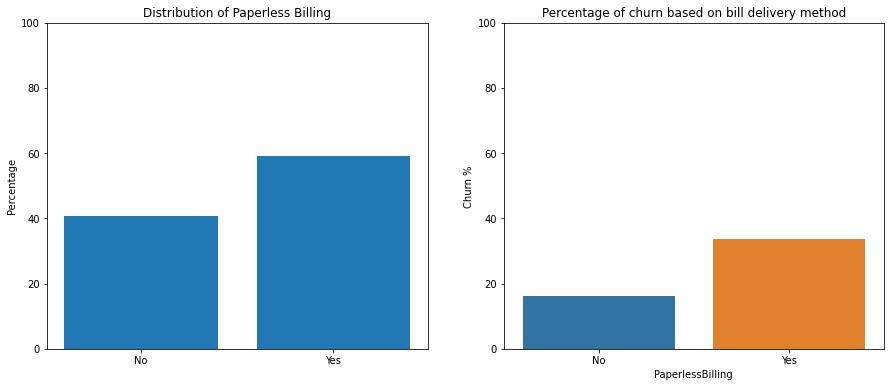

In [14]:
# Paperless billing

ig, [axes8, axes9] = plt.subplots(1, 2, figsize=(15,6))

data = dataset["PaperlessBilling"].value_counts(normalize=True)
axes8.bar(data.index, data*100)
axes8.set_title('Distribution of Paperless Billing')
axes8.set_ylabel('Percentage')
axes8.set_xticks([0, 1])
axes8.set_xticklabels(['No', 'Yes'])
axes8.set_ylim(0,100)

sns.barplot(x="PaperlessBilling", y=dataset.ChurnNumeric*100, data=dataset, ci=None, ax=axes9)
axes9.set_ylabel('Churn %')
axes9.set_title('Percentage of churn based on bill delivery method')
axes9.set_ylim(0,100)
axes9.set_xticklabels(['No', 'Yes'])

plt.show()

# Paperless billing chance compared to the distribution gives no conclusive information about this predictor.
# Thus, paperless billing will be dropped as a predictor